## 일급함수

함수를 객체에 대입

In [ ]:
def foo(x):
    return f"Foo result = {x}"

In [ ]:
foo

In [ ]:
boo = foo

In [ ]:
boo

In [ ]:
boo(100)

함수를 반환

In [ ]:
def plus(x, y):
    return x + y

def minus(x, y):
    return plus        #plus 객체를 반환

In [ ]:
plus

In [ ]:
minus

In [ ]:
foo = minus(100, 40)
foo

In [ ]:
foo(10, 5)

반환된 함수객체의 id 변화를 알아보세요!!!

반환되는 함수의 매개변수를 전달.

In [ ]:
minus(100, 40)(10, 5)    # lambda 표현식의 매개변수 동일!

In [ ]:
minus(100, 40)

### 함수를 매개변수의 인자로 전달

In [ ]:
def plus(x, y):
    return x + y

def minus(x, y):
    return x - y

In [ ]:
plus, minus

In [ ]:
id(plus), id(minus)

In [ ]:
def apply(func, x, y):
    return func(x, y)

In [ ]:
apply

In [ ]:
apply(plus, 10, 5)

In [ ]:
apply(minus, 10, 5)

In [ ]:
def apply(func, x, y):
    print(id(func))
    return func(x, y)

In [ ]:
apply(plus, 10, 5)

In [ ]:
apply(minus, 10, 5)

### 일급함수는 속성을 가진다.

In [ ]:
dir(apply)

In [ ]:
apply.__code__

In [ ]:
apply.__class__

In [ ]:
def foo(x, y):
    pass

In [ ]:
foo.__class__

In [ ]:
print(dir(foo))

In [ ]:
a = 100

In [ ]:
a.__class__

In [ ]:
type(a)

---

## 중첩함수

In [ ]:
def outer():
    j = 10
    
    def inner():
        print(f"Inside of Inner: {j}")

    return inner()

In [ ]:
outer

In [ ]:
outer.__code__

In [ ]:
outer()

In [ ]:
o = outer()

In [ ]:
o

In [ ]:
type(o)

In [ ]:
o = None

In [ ]:
type(o)

### 중첩함수의 일급함수 적용

outer에서 inner 함수 객체 반환

In [ ]:
def outer():
    j = 10
    
    def inner():
        print(f"Inside of Inner: {j}")

    return inner

In [ ]:
outer

In [ ]:
foo = outer()
foo

In [ ]:
foo()

함수 생명주기는 함수 호출후 처리후 종료되면 생명주기도 종료된다.

객체가 생존하기 위해서는 두 가지 조건이 만족해야 함 
 - 생존 지역 (Life Area) :네임스페이스
 - 생존 시간 (Life Time)
 - 객체는 해당 네임스페이스 안에서만 생존 가능
 - 객체는 주어진 생존 시간 동안만 생존 가능
 - 네임 스페이스가 종료되면 생존 시간(Life Time)도 종료됨                                                                                 

함수객체는 반환후 생존


함수 클로저 원리에 따라 내부 함수를 반환시 생명주기는 반환 받은 변수를 따라감



In [ ]:
def outer():
    j = 10
    
    def inner():
        print(f"Inside of Inner: {j}")

    print(locals())
    return inner

outer에서 locals() 출력해 보세요ㅕ!!!

In [ ]:
def outer():
    j = 10
    
    def inner():
        print(f"Inside of Inner: {j}")

    print(locals())
    print(id(inner))
    return inner

In [ ]:
foo = outer()
foo

In [ ]:
id(foo)

In [ ]:
hex(id(outer))

In [ ]:
del outer

In [ ]:
foo

In [ ]:
foo()

## closure

내부(함수(=inner)의 __closure__ 라는 속성을 통해 함수를 감싸고 있는 범위의 변수를 확인할수있음
 > 2.x는 func_closure

일급함수가 함수객체를 반환하면 해당 객체의 생명주기는 반환받은 객체에 따라간다.

In [ ]:
def outer():
    j = 10
    
    def inner():
        print(f"Inside of Inner: {j}")
    
    print(locals())
    return inner

In [ ]:
foo = outer()

In [ ]:
foo()

In [ ]:
foo.__closure__

In [ ]:
hex(id(outer))

In [ ]:
outer.__closure__

새 outer 객체 실행

In [ ]:
bar = outer()

In [ ]:
bar.__closure__

In [ ]:
hex(id(outer))

클로저 함수로 전달된 인자의 기억

In [ ]:
def outer(x):
    
    def inner():
        print(f"Inside of Inner: {x}")
    
    return inner

In [ ]:
print1 = outer(1)
print2 = outer(2)

In [ ]:
print1()

In [ ]:
print2()


데코레이터는 outer - inner 함수와 같이 감싼패턴의 특징으로 구현해서 목표 함수가 실행되기 전에 처리할 수 있는 함수를 이야기 한다.



#### 클로저 활용

In [ ]:
def outer(x):
    
    def inner():
        print(f"Inside of Inner: {x}")

    return inner

In [ ]:
foo1 = outer(1)
foo2 = outer(2)

In [ ]:
foo1()

In [ ]:
foo2()

In [ ]:
foo1.__closure__

In [ ]:
foo2.__closure__

## 데코레이터

데코레이션 패턴

- 클로저 현상을 이용해 재정의 하려는 목표 함수의 내용을 대체할 
- 실행 함수를 데코레이터로 감싼 함수로 변환해 처리하는 것이다.
- 즉 목표 함수를 건드리지 않고 함수의 실행 내용을 감싼 함수로 변환해 처리한다.




In [ ]:
def foo():                # 원래함수
    return 1

In [ ]:
foo()

In [ ]:
def outer(func):           # 데코레이터 함수
    """
    ounter 데코레이터 함수
     - func 에 +1 한 함수 객체를 반환
    """
    def inner():
        ret = func()
        return ret + 1

    return inner

In [ ]:
decorated = outer( foo )   ## 데코레이터로 원래 함수를 감싼다.

In [ ]:
decorated()

#### 로그 데코레이터 작성

In [ ]:
def foo():
    """
    원래 함수: foo
    """
    print("<<<<<<<<< Original foo >>>>>>>>>")
    return 1

In [ ]:
foo()

In [ ]:
foo.__doc__

foo를 감싸는 새 함수!!!

In [ ]:
def outer(func):
    """
    Logger decorator
     - func 함수 실행 전/후로 로그 출력!
    """

    def inner():
        """
        클로저 효과를 얻는 내부 함수
        """
        
        print("==== before func exec ====")
        ret = func()    # 전달 받은 함수를 반환해야 한다.
        print("==== after func exec ====")
        return ret + 1
    return inner

In [ ]:
decorated = outer(foo)
decorated()

In [ ]:
help(outer)

In [ ]:
help(decorated)

### 데코레이터 이용

 - 파이썬 2.4 이후에 decorator 함수는 '@'마크를 사용해 
- 감쌀 함수에 어노테이션으로 사용 할 수 있다.

#### @ 데코레이터 어노테이션 사용

In [ ]:
# 데코레이터
def wrapper(func):
    """
    Logger decorator
     - func 함수 실행 전/후로 로그 출력!
    """

    def inner():
        print("==== before func exec ====")
        func() 
        print("==== after func exec ====")
    return inner

In [ ]:
# 원래 함수
def foo():
    print("<<<<<<<<< Original foo >>>>>>>>>")

In [ ]:
foo()

In [ ]:
decorated = wrapper(foo)
decorated()

어노테이션 선언

In [ ]:
# 원래 함수
@wrapper
def foo():
    print("<<<<<<<<< Original foo >>>>>>>>>")

In [ ]:
foo()

### 반환값 데코레이터

In [ ]:
# 원래 함수
def foo():
    print("<<<<<<<<< Original foo >>>>>>>>>")
    return 1

In [ ]:
foo()

In [ ]:
# 데코레이터
def wrapper(func):
    """
    Logger decorator
     - func 함수 실행 전/후로 로그 출력!
    """

    def inner():
        print("==== before func exec ====")
        ret = func() 
        print("==== after func exec ====")
        return ret + 1  # 새로운 처리
        
    return inner

In [ ]:
@wrapper
def foo():
    print("<<<<<<<<< Original foo >>>>>>>>>")
    return 1

In [ ]:
foo()

### 매개변수 전달

In [ ]:
# 원래 함수
def foo(name):
    print("<<<<<<<<< Original foo >>>>>>>>>")
    print(f'Name: {name}')
    return 1

In [ ]:
foo('홍')

In [ ]:
# 데코레이터
def wrapper(func):
    def inner(name):
        print("==== before func exec ====")
        ret = func(name) 
        print("==== after func exec ====")
        return ret
        
    return inner

In [ ]:
@wrapper
def foo(name):
    print("<<<<<<<<< Original foo >>>>>>>>>")
    print(f'Name: {name}')
    return 1

In [ ]:
foo('홍길동')

In [ ]:
# 데코레이터
def wrapper(func):
    def inner(*arg, **kwargs):
        print("==== before func exec ====")
        ret = func(*arg, **kwargs) 
        print("==== after func exec ====")
        return ret
        
    return inner

In [ ]:
@wrapper
def foo(name):
    print("<<<<<<<<< Original foo >>>>>>>>>")
    print(f'Name: {name}')
    return 1

In [ ]:
foo('홍길동')

In [ ]:
@wrapper
def foo(x, y):
    print(f'{x + y}')
    return x + y

In [ ]:
foo(10, 20)

### 데코레이터 인자 전달

In [ ]:
def foo(x, y):
    print("foo: x+y=", x+y)
    return x + y

In [ ]:
foo(1,2)

In [ ]:
# 데코레이터
def returnvalue(arg):
    def wrapper(func):
        def inner(*args, **kwargs):
            if arg == True:
                print(f'Argument: {arg}')
            if arg == False:
                print(f'Oh no....')
        return inner
    return wrapper

In [ ]:
@returnvalue(True)
def foo(x, y):
    print("foo: x+y=", x+y)
    return x + y

In [ ]:
foo(1,2)

### 함수 파라미터를 로깅하는 데코레이터


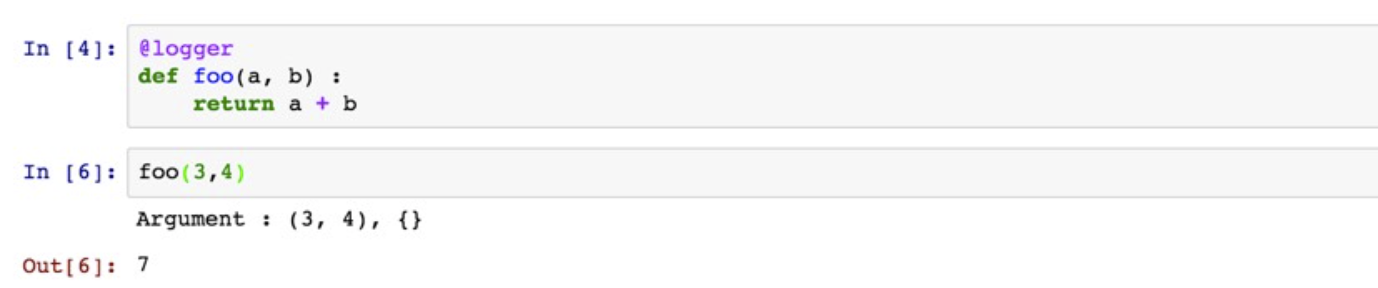

In [ ]:
def logger(func):
    
    def inner(*arg, **args):
        print("Argument:", arg, args)
        ret = func(*arg, **args)
        return ret
    return inner

In [ ]:
@logger
def foo(x, y):
    print("I'm foo: ", x+y)

In [ ]:
foo("하나", "둘")

### 함수의 실행 성능(=수행시간)을 측정하는 데코레이터

실행시간 측정!

In [ ]:
def foo(a):
    return factorial(a)

def factorial(a):
    if a == 1:
        return 1
    else:
        return a * factorial(a-1)

In [ ]:
import time

def checkTime(func):    # 데코레이터
    def inner(*arg, **args):
        starttime = time.time()
        ret = func(*arg, **args)
        endtime = time.time()
        print(f'{func.__name__}: 실행시간 {endtime - starttime:{10}.{4}}')
        return ret
    return inner

In [ ]:
@checkTime
def foo(a):
    return factorial(a)

In [ ]:
foo(1000)

#### 블로킹

In [ ]:
def foo(x, y, z):
    print('foo()')
    return x + y + z

In [ ]:
foo(1,2,3)

In [ ]:
def blocking(argument):     # 블로킹 데코레이터

    def inner(*arg, **args):
        pass
    
    return inner

In [ ]:
@blocking
def foo(x, y, z):
    print('foo()')
    return x + y + z

In [ ]:
foo(1,2,3)

### 다중 어노테이션(데코레이터)!!!

In [ ]:
# 원래
def hello():
    return "Hello!"
hello()

In [ ]:
# strong 데코레이터!
def strong(func):
    """
    <strong> 으로 감싸준다.
    """
    def wrapper():
        return '<strong>' + func() + '</strong>'
    return wrapper

In [ ]:
# em 데코레이터!
def emphasize(func):
    """
    <em> 으로 감싸준다.
    """
    def wrapper():
        return '<em>' + func() + '</em>'
    return wrapper

In [ ]:
# 데코레이션: <strong><em> 원래 문자열 </em></strong>
@strong
@emphasize
def hello():
    return "Hello!"

In [ ]:
hello()

감싼함수

In [ ]:
# 원래
def hello():
    return "Hello!"
hello()

In [ ]:
decorated = emphasize(strong(hello))
decorated()

In [ ]:
decorated = strong(emphasize(hello))
decorated()